# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#Set unit to metric
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        response = requests.get(city_url)
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | yuzhno-kurilsk
Processing Record 3 of Set 1 | belleville
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | thiers
Processing Record 8 of Set 1 | merced
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | zaozersk
Processing Record 12 of Set 1 | tocopilla
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | menaka
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | nadym
Processing Record 18 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 19 of Set 1 | sisimiut
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | fortuna
Processing Rec

City not found. Skipping...
Processing Record 42 of Set 4 | lazaro cardenas
Processing Record 43 of Set 4 | formosa do rio preto
Processing Record 44 of Set 4 | ponta delgada
Processing Record 45 of Set 4 | wau
Processing Record 46 of Set 4 | tobi village
City not found. Skipping...
Processing Record 47 of Set 4 | le beausset
Processing Record 48 of Set 4 | cabedelo
Processing Record 49 of Set 4 | berriane
Processing Record 0 of Set 5 | lorengau
Processing Record 1 of Set 5 | yemetsk
Processing Record 2 of Set 5 | rio grande
Processing Record 3 of Set 5 | albany
Processing Record 4 of Set 5 | surendranagar
Processing Record 5 of Set 5 | new norfolk
Processing Record 6 of Set 5 | pitimbu
Processing Record 7 of Set 5 | kabalo
Processing Record 8 of Set 5 | yelan'-koleno
Processing Record 9 of Set 5 | katsuura
Processing Record 10 of Set 5 | shiyan
Processing Record 11 of Set 5 | grand falls-windsor
Processing Record 12 of Set 5 | kodiak
Processing Record 13 of Set 5 | moses lake
Processi

Processing Record 34 of Set 8 | vyksa
Processing Record 35 of Set 8 | toga village
City not found. Skipping...
Processing Record 36 of Set 8 | huatabampo
Processing Record 37 of Set 8 | dadonghai
City not found. Skipping...
Processing Record 38 of Set 8 | boali
Processing Record 39 of Set 8 | berdigestyakh
Processing Record 40 of Set 8 | pavlodar
Processing Record 41 of Set 8 | madera
Processing Record 42 of Set 8 | karachi
Processing Record 43 of Set 8 | swift current
Processing Record 44 of Set 8 | igarka
Processing Record 45 of Set 8 | dongola
Processing Record 46 of Set 8 | amarante do maranhao
Processing Record 47 of Set 8 | el calafate
Processing Record 48 of Set 8 | usinsk
Processing Record 49 of Set 8 | ballina
Processing Record 0 of Set 9 | bloomfield
Processing Record 1 of Set 9 | naze
Processing Record 2 of Set 9 | balaipungut
Processing Record 3 of Set 9 | butterworth
Processing Record 4 of Set 9 | jaciara
Processing Record 5 of Set 9 | al jawf
Processing Record 6 of Set 9 

Processing Record 25 of Set 12 | brooks
Processing Record 26 of Set 12 | gebeit
Processing Record 27 of Set 12 | saint-joseph
Processing Record 28 of Set 12 | mchinji
Processing Record 29 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 30 of Set 12 | bondo
Processing Record 31 of Set 12 | howrah
Processing Record 32 of Set 12 | arkhangel'sk
Processing Record 33 of Set 12 | darlowo
Processing Record 34 of Set 12 | plettenberg bay
Processing Record 35 of Set 12 | sao jose da coroa grande
Processing Record 36 of Set 12 | le vauclin
Processing Record 37 of Set 12 | umm kaddadah
Processing Record 38 of Set 12 | dese
Processing Record 39 of Set 12 | olyokminsk
Processing Record 40 of Set 12 | mercedes
Processing Record 41 of Set 12 | nice
Processing Record 42 of Set 12 | roma
Processing Record 43 of Set 12 | north battleford
Processing Record 44 of Set 12 | tosontsengel
Processing Record 45 of Set 12 | obihiro
Processing Record 46 of Set 12 | nguruka
Processing Record 47

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-2.66,62,100,5.66,SJ,1707687866
1,yuzhno-kurilsk,44.0306,145.8556,-7.57,81,63,2.43,RU,1707687866
2,belleville,44.1788,-77.3705,2.92,69,100,5.14,CA,1707687673
3,cabo san lucas,22.8909,-109.9124,23.20,54,20,3.09,MX,1707687333
4,port-aux-francais,-49.3500,70.2167,6.94,84,100,11.52,TF,1707687866


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-2.66,62,100,5.66,SJ,1707687866
1,yuzhno-kurilsk,44.0306,145.8556,-7.57,81,63,2.43,RU,1707687866
2,belleville,44.1788,-77.3705,2.92,69,100,5.14,CA,1707687673
3,cabo san lucas,22.8909,-109.9124,23.20,54,20,3.09,MX,1707687333
4,port-aux-francais,-49.3500,70.2167,6.94,84,100,11.52,TF,1707687866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

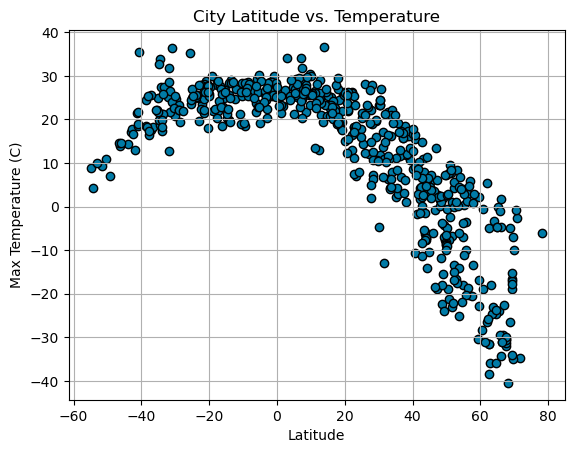

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature, marker="o", facecolors="#007ba7", edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

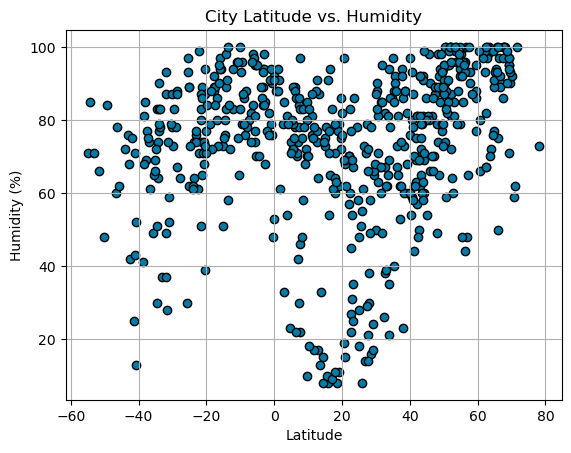

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, marker="o", facecolors="#007ba7", edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

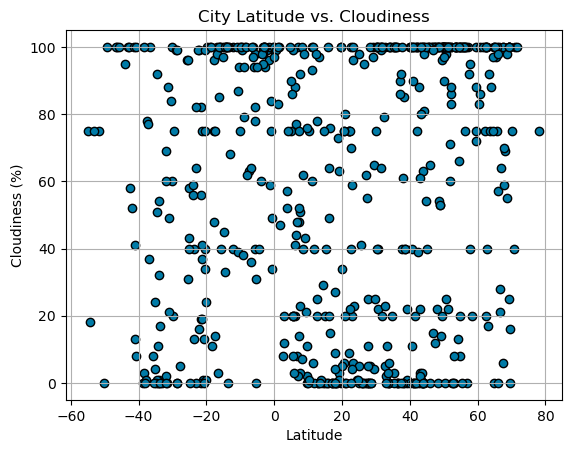

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, marker="o", facecolors="#007ba7", edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

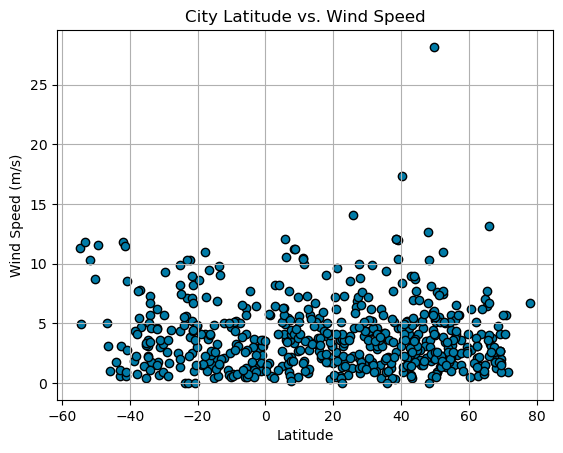

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]
plt.scatter(latitude, wind, marker="o", facecolors="#007ba7", edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    equation = f"y= {round(slope,2)}x + {round(intercept,2)}"
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(equation, (min(x_values), max(y_values)), color="r", fontsize=15)
    print(f"The r-value is: {rvalue}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-2.66,62,100,5.66,SJ,1707687866
1,yuzhno-kurilsk,44.0306,145.8556,-7.57,81,63,2.43,RU,1707687866
2,belleville,44.1788,-77.3705,2.92,69,100,5.14,CA,1707687673
3,cabo san lucas,22.8909,-109.9124,23.20,54,20,3.09,MX,1707687333
6,thiers,45.8333,3.5000,6.18,90,65,1.50,FR,1707687867


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,6.94,84,100,11.52,TF,1707687866
5,edinburgh of the seven seas,-37.0676,-12.3116,17.52,74,37,7.76,SH,1707687866
8,blackmans bay,-43.0167,147.3167,17.07,76,100,0.56,AU,1707687867
9,grytviken,-54.2811,-36.5092,4.33,85,18,4.92,GS,1707687867
11,tocopilla,-22.0920,-70.1979,23.42,71,99,3.87,CL,1707687867


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.861536053232941


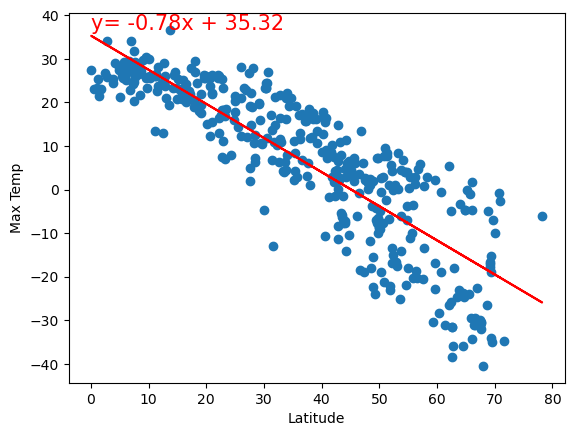

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values)
linear_regression(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.5490952407415928


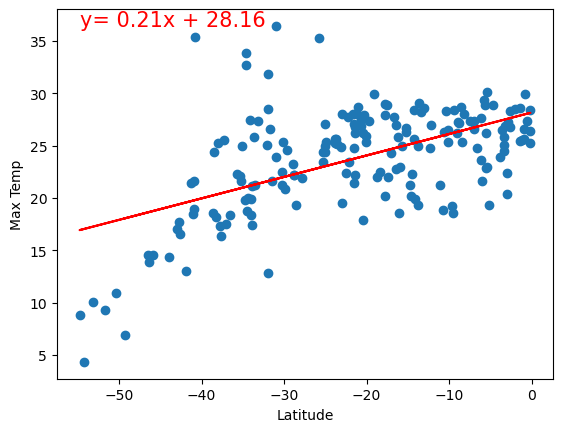

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values)
linear_regression(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** The northern hemi plot has a r value of -0.86 is closer to 1 in absolute value, indicating a stronger relationship than the southern hemi plot.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.42243920028785303


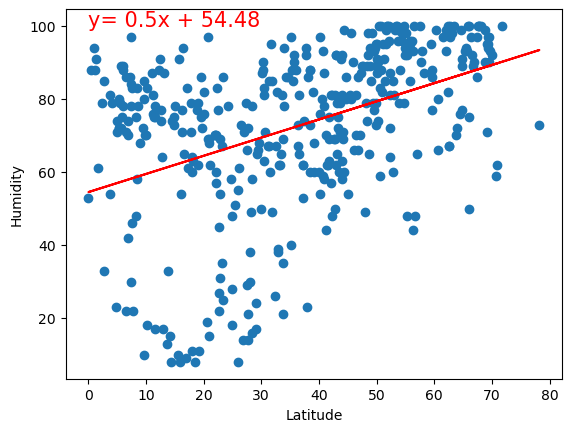

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.scatter(x_values, y_values)
linear_regression(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.459113005772648


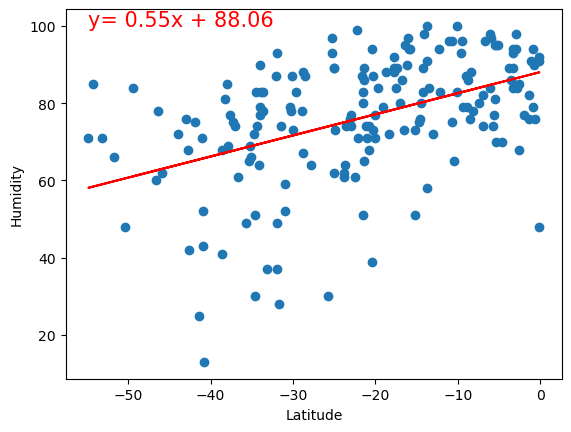

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.scatter(x_values, y_values)
linear_regression(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Both r values indicate that there is not a strong positive linear relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2936723645901906


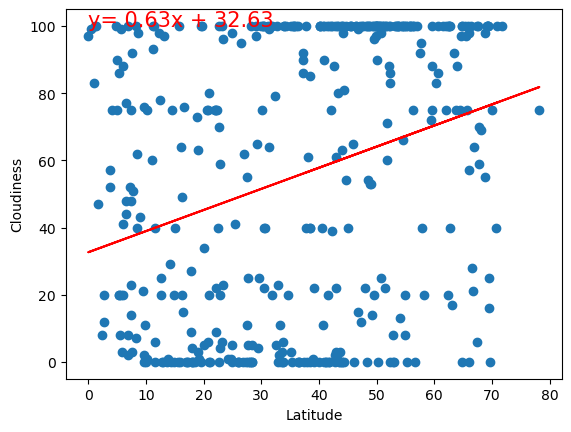

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values)
linear_regression(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.33115660957068904


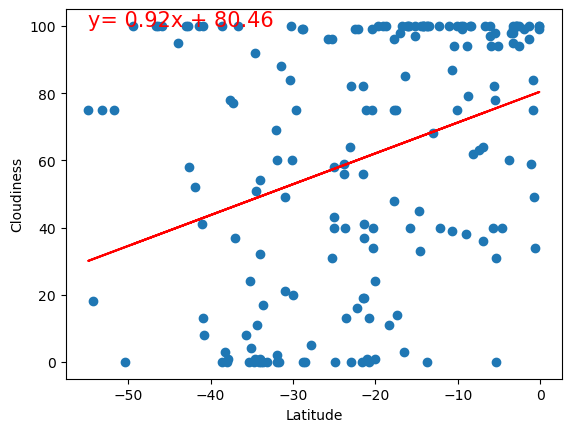

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values)
linear_regression(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** Both r values indicate that there is not a strong positive linear relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0754115346030194


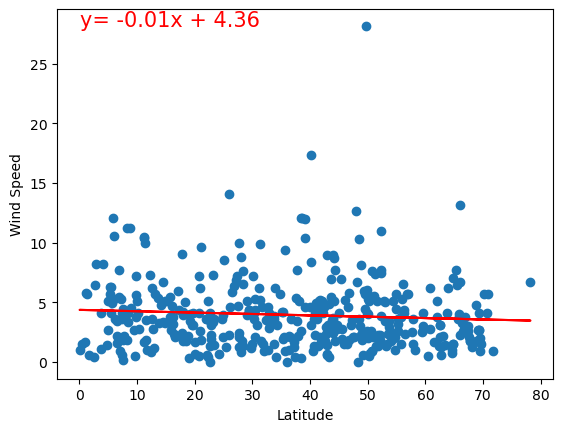

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values)
linear_regression(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.2855216251855229


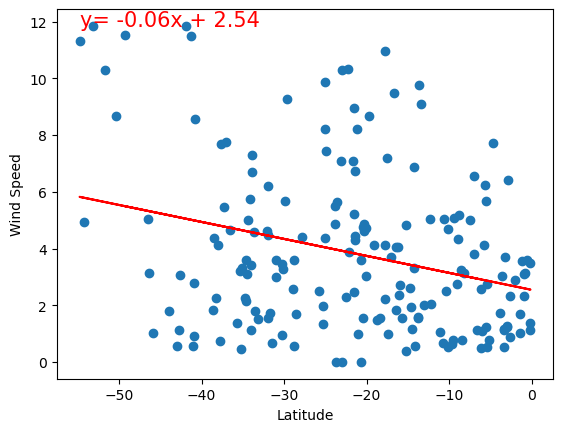

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values)
linear_regression(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** Both r values indicate that there is not a strong linear relationship. 